# **AI Text Detection Project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv('/content/DetectAI.csv', on_bad_lines='skip', engine='python')

In [5]:
df.sample(5)

,text,generated
11442,The concept of aliens is a topic that some of ...,0
15498,"Dear Senator,\n\nI am writing to you to expres...",1
27948,"Dear saaae senaaor, My leaaer is in regards ao...",0
28763,"Dear Senator PROPER_NAME, As you are well awar...",0
1818,Many people use cars to get from one place to ...,0


In [6]:
df.shape

(29145, 2)

# **Data Cleaning**

In [7]:
df.isnull().sum()

,0
text,0
generated,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


**No missing values**

In [9]:
df.duplicated().sum()

1805

 **There are 1805 duplicates in the dataset**

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.duplicated().sum()

0

**Now, no duplicates in the dataset**

In [13]:
df.shape

(27340, 2)

# **Exploratory Data Analysis**

In [14]:
df["generated"].value_counts()

,count
generated,
0,16122
1,11218


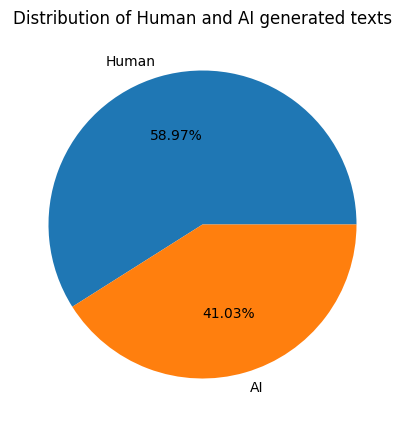

In [15]:
plt.figure(figsize=(10, 5))
plt.pie(df["generated"].value_counts(),labels=["Human","AI"],autopct='%0.2f%%')
plt.title("Distribution of Human and AI generated texts")
plt.show()

**About 41% texts are generated by AI tools in the dataset**
**Mildly imbalanced! but since the dataset is large, hence manageable.**

In [16]:
df.columns=["t","g"]

In [17]:
df["n_c"]=df["t"].apply(len)

In [18]:
df["n_w"]=df["t"].apply(lambda  x:len(nltk.word_tokenize(x)))

In [19]:
df["n_s"]=df["t"].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [20]:
df[df["g"]==0][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,16122.000000,16122.000000,16122.000000
mean,2337.850205,464.753318,20.749721
std,1025.115700,202.273066,9.952730
min,239.000000,52.000000,1.000000
25%,1573.000000,314.000000,14.000000
50%,2182.000000,434.000000,20.000000
75%,2895.000000,574.000000,26.000000
max,9157.000000,1764.000000,102.000000


In [21]:
df[df["g"]==1][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,11218.000000,11218.000000,11218.000000
mean,1944.489214,340.615974,14.244696
std,825.142451,137.599515,6.268937
min,1.000000,1.000000,1.000000
25%,1304.250000,240.250000,10.000000
50%,2007.000000,352.000000,13.000000
75%,2355.000000,385.000000,18.000000
max,5078.000000,916.000000,96.000000


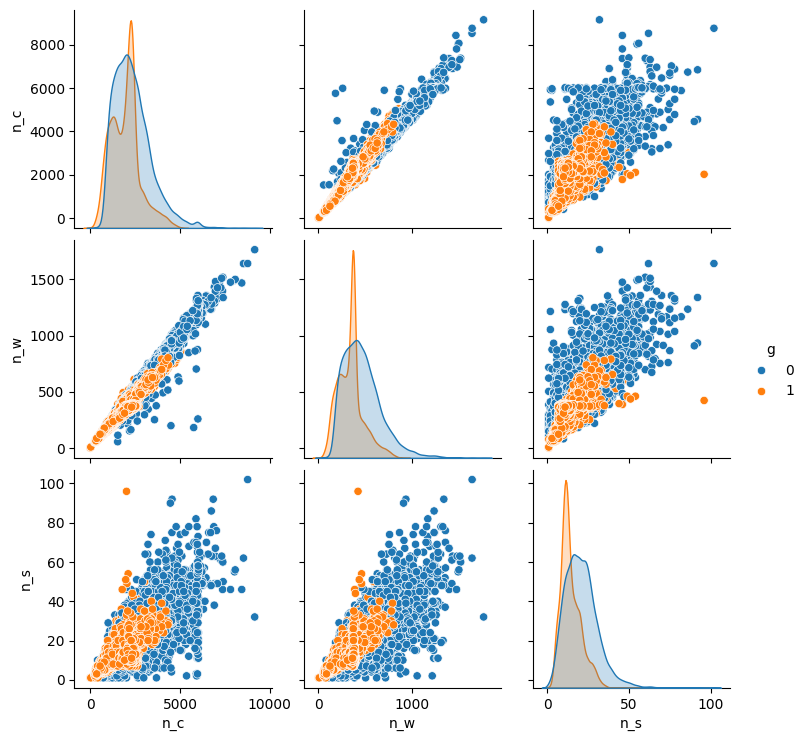

In [22]:
sns.pairplot(df,hue="g")

In [23]:
df[["g","n_c","n_w","n_s"]].corr()

,g,n_c,n_w,n_s
g,1.000000,-0.199951,-0.323529,-0.347531
n_c,-0.199951,1.000000,0.977353,0.787285
n_w,-0.323529,0.977353,1.000000,0.833933
n_s,-0.347531,0.787285,0.833933,1.000000


<Axes: >

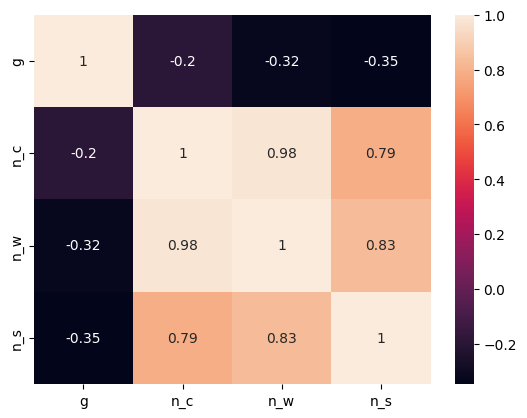

In [24]:
sns.heatmap(df[["g","n_c","n_w","n_s"]].corr(),annot=True)

**Since the multicollinearity is present, I will keep only one column i.e., n_s because of its variability wrt "g"**

# **Text preprocessing**

In [25]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [26]:
list(stop_words)[:10]

['only', 'me', 'at', 'other', 'being', 'there', 'any', 'couldn', 'my', 'its']

In [27]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)  # keeps only letters and spaces

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Remove special characters
    words = [word for word in words if word.isalnum()==1]

    # 6. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    # 7. Re-join words into a string
    return ' '.join(words)

In [28]:
for i in range(len(df)):
    df["t"][i]=preprocess_text(df["t"][i])

In [29]:
preprocess_text("hey, what is your name?")

'hey name'

In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [31]:
AI_wc=wc.generate(df[df["g"]==1]["t"].str.cat(sep=" "))

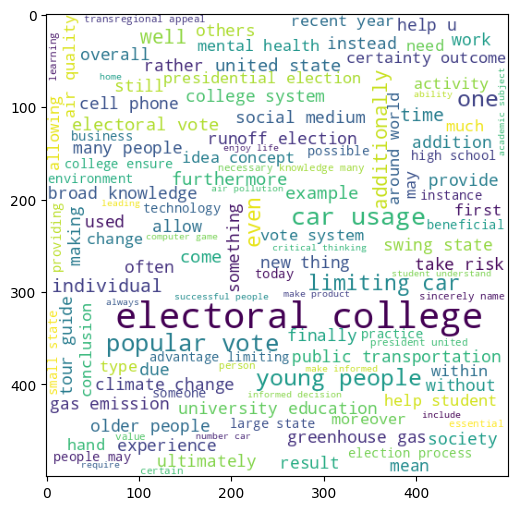

In [32]:
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [33]:
Human_wc=wc.generate(df[df["g"]==0]["t"].str.cat(sep=" "))

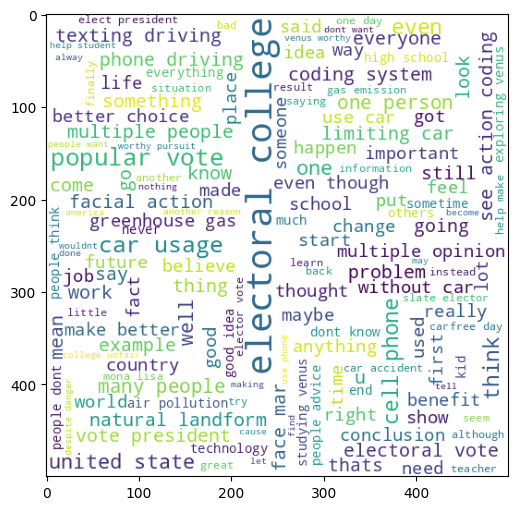

In [34]:
plt.figure(figsize=(6,6))
plt.imshow(Human_wc)

**Clearly, word cloud is not a distinguishing factor**

# **Feature Engineering**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=300)

In [36]:
X=tfidf.fit_transform(df["t"]).toarray()

In [37]:
X.shape

(27340, 300)

In [38]:
y=df["g"].values

# **Model Building**

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train

array([[0.        , 0.13823488, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06310798, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.31473493, 0.        , ..., 0.        , 0.03407015,
        0.15621579],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07838386]])

In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score,classification_report

In [42]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [43]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [44]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.8857768052516412
Recall : 0.9015590200445435
f1 score : 0.893598233995585
********************************************************
              precision    recall  f1-score   support

       Human       0.93      0.92      0.92      3223
          AI       0.89      0.90      0.89      2245

    accuracy                           0.91      5468
   macro avg       0.91      0.91      0.91      5468
weighted avg       0.91      0.91      0.91      5468



In [45]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)

In [46]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9321948769462581
Recall : 0.8267260579064588
f1 score : 0.8762983947119924
********************************************************
              precision    recall  f1-score   support

       Human       0.89      0.96      0.92      3223
          AI       0.93      0.83      0.88      2245

    accuracy                           0.90      5468
   macro avg       0.91      0.89      0.90      5468
weighted avg       0.91      0.90      0.90      5468



In [47]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)

In [48]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9483378256963163
Recall : 0.9403118040089087
f1 score : 0.9443077611272646
********************************************************
              precision    recall  f1-score   support

       Human       0.96      0.96      0.96      3223
          AI       0.95      0.94      0.94      2245

    accuracy                           0.95      5468
   macro avg       0.95      0.95      0.95      5468
weighted avg       0.95      0.95      0.95      5468



In [49]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [50]:
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [51]:
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [52]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred4))
print("Recall :",recall_score(y_test,y_pred4))
print("f1 score :",f1_score(y_test,y_pred4))
print("********************************************************")
print(classification_report(y_test, y_pred4, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9822161422708618
Recall : 0.9594654788418708
f1 score : 0.9707075259125733
********************************************************
              precision    recall  f1-score   support

       Human       0.97      0.99      0.98      3223
          AI       0.98      0.96      0.97      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.97      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [53]:
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [54]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred5))
print("Recall :",recall_score(y_test,y_pred5))
print("f1 score :",f1_score(y_test,y_pred5))
print("********************************************************")
print(classification_report(y_test, y_pred5, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9860423232778028
Recall : 0.9755011135857461
f1 score : 0.980743394536498
********************************************************
              precision    recall  f1-score   support

       Human       0.98      0.99      0.99      3223
          AI       0.99      0.98      0.98      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [55]:
X_df = pd.DataFrame(X)

# Step 2: Add the new column
X_df["n_s"] = df['n_s'].values

In [56]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,n_s
0,0.0,0.040009,0.0,0.0,0.068137,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.025945,0.024087,0.0,0.023878,0.0,0.0,0.025986,0.0,28
1,0.0,0.048657,0.0,0.0,0.041433,0.0,0.040012,0.038072,0.0,0.0,...,0.0,0.000000,0.029294,0.0,0.000000,0.0,0.0,0.000000,0.0,26
2,0.0,0.000000,0.0,0.0,0.037462,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.028529,0.026486,0.0,0.000000,0.0,0.0,0.000000,0.0,27
3,0.0,0.050259,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.030258,0.0,0.000000,0.0,0.0,0.000000,0.0,23
4,0.0,0.050124,0.0,0.0,0.042682,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.030177,0.0,0.000000,0.0,0.0,0.000000,0.0,22


In [57]:
X_df.columns=X_df.columns.astype(str)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size=0.2,random_state=42)

In [59]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
pd.DataFrame(X_train).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
7463,0.000000,0.000000,0.000000,0.316308,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.174799,0.095076,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.115789
16110,0.087270,0.262809,0.000000,0.000000,0.000000,0.000000,0.000000,0.041070,0.0,0.000000,...,0.0,0.000000,0.085887,0.043789,0.030897,0.000000,0.00000,0.000000,0.0,0.336842
3508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.117712,0.032013,0.000000,0.000000,0.078776,0.00000,0.041516,0.0,0.231579
9998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.067728,...,0.0,0.362706,0.000000,0.000000,0.000000,0.020228,0.12945,0.000000,0.0,0.294737
16062,0.000000,0.000000,0.000000,0.000000,0.556793,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.072729,0.000000,0.00000,0.000000,0.0,0.263158
21144,0.000000,0.000000,0.000000,0.000000,0.595285,0.000000,0.143976,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.126316
6665,0.045150,0.000000,0.000000,0.000000,0.000000,0.224017,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.145790,0.00000,0.000000,0.0,0.315789
8857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.164518,0.201306,0.000000,0.350863,0.00000,0.000000,0.0,0.242105
13968,0.045314,0.204692,0.000000,0.000000,0.000000,0.000000,0.000000,0.042650,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.077114,0.0,0.210526
13192,0.085318,0.000000,0.237569,0.000000,0.000000,0.084664,0.000000,0.321208,0.0,0.000000,...,0.0,0.051458,0.027989,0.000000,0.060411,0.022958,0.00000,0.000000,0.0,0.242105


In [61]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred4=rf1.predict(X_test)

In [62]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred4))
print("Recall :",recall_score(y_test,y_pred4))
print("f1 score :",f1_score(y_test,y_pred4))
print("********************************************************")
print(classification_report(y_test, y_pred4, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9867881548974943
Recall : 0.9648106904231626
f1 score : 0.9756756756756757
********************************************************
              precision    recall  f1-score   support

       Human       0.98      0.99      0.98      3223
          AI       0.99      0.96      0.98      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [63]:
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)
y_pred6=xgb1.predict(X_test)

In [64]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred6))
print("Recall :",recall_score(y_test,y_pred6))
print("f1 score :",f1_score(y_test,y_pred6))
print("********************************************************")
print(classification_report(y_test, y_pred6, target_names=["Human", "AI"]))

********************************************************
Precision : 0.988256549232159
Recall : 0.9746102449888642
f1 score : 0.9813859609777977
********************************************************
              precision    recall  f1-score   support

       Human       0.98      0.99      0.99      3223
          AI       0.99      0.97      0.98      2245

    accuracy                           0.98      5468
   macro avg       0.99      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



# **Deep Learning Models**

In [65]:
pip install gensim

In [66]:
df

,t,g,n_c,n_w,n_s
0,carfree city become subject increasing interes...,1,4091,643,28
1,car free city carfree city concept gaining tra...,1,3757,590,26
2,sustainable urban future carfree city emerging...,1,3828,585,27
3,pioneering sustainable urban living era marked...,1,3739,583,23
4,path sustainable urban living age rapid urbani...,1,3698,577,22
...,...,...,...,...,...
27335,today society everevolving role technology gro...,1,2533,373,13
27336,everevolving world technology changed way indi...,1,2357,379,13
27337,fostering rescue dog gaining unconditional lov...,1,2097,368,11
27338,importance solid foundation education paramoun...,1,1911,310,10


In [67]:
from nltk.tokenize import word_tokenize

In [68]:
# Sample: Use your own dataframe
texts = df['t'].astype(str).apply(word_tokenize)
labels = df['g']  # 0 = Human, 1 = AI

In [69]:
!pip uninstall -y gensim numpy
!pip install gensim numpy==1.26.4

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you hav

In [70]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=texts,
                     vector_size=300,   # dimension of word embeddings
                     window=5,       # context window size
                     min_count=1,    # ignore rare words
                     sg=1)  # 1 = Skip-gram


In [71]:
w2v_model.wv['great']  # get vector for word 'ai'

array([-0.01123644, -0.10243614, -0.0107864 , -0.06846936, -0.02022662,
        0.2729591 , -0.1077701 ,  0.45477623,  0.12632807,  0.41147977,
       -0.25610876,  0.03453897,  0.2152057 , -0.67057985, -0.461129  ,
       -0.06665771,  0.16545609, -0.27723345,  0.11124169,  0.05031107,
       -0.12004466, -0.17302795,  0.26780462, -0.01369026,  0.15091972,
        0.29662988, -0.28655317,  0.12766297, -0.08529401,  0.07260362,
       -0.2481057 ,  0.20647529, -0.0568665 ,  0.05582993,  0.05717949,
        0.08141494, -0.2549794 ,  0.06790915,  0.08829752,  0.04556878,
       -0.24605441,  0.33748043,  0.01649732,  0.22661155,  0.13406019,
        0.4169362 ,  0.21254745,  0.23809   ,  0.21246266, -0.01227146,
       -0.1844376 , -0.24574836,  0.19055709,  0.01373691, -0.00584314,
       -0.21863532, -0.1375422 ,  0.36056128,  0.10841808,  0.16220152,
        0.21751016,  0.2234051 ,  0.05963654,  0.25278035, -0.2394567 ,
       -0.0720698 , -0.09853508,  0.05063862, -0.29847038,  0.28

In [72]:
w2v_model.wv.most_similar('great')

[('amazing', 0.5959217548370361),
 ('excellent', 0.5922579169273376),
 ('fantastic', 0.5907930135726929),
 ('shold', 0.576772928237915),
 ('groupled', 0.5766167044639587),
 ('grate', 0.5756416320800781),
 ('helpfull', 0.5748882293701172),
 ('good', 0.5718569159507751),
 ('definitly', 0.5571272373199463),
 ('awesome', 0.5559377670288086)]

In [73]:
vocab_set = set(w2v_model.wv.index_to_key)
vector_size = w2v_model.vector_size
X_w2v = np.zeros((len(df), vector_size))
for i, text in enumerate(df['t']):
    vectors = [w2v_model.wv[word] for word in text if word in vocab_set]
    if vectors:
        X_w2v[i] = np.mean(vectors, axis=0)


In [74]:
X_w2v.shape

(27340, 300)

In [75]:
y_w2v = df['g'].values

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels if they are not numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y_w2v)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y_encoded, test_size=0.2, random_state=42)

# Reshape input for RNN: (samples, time_steps, features)
# We'll use time_steps = 1 because each input is a fixed-size vector
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have >2 classes

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6065 - loss: 0.6613 - val_accuracy: 0.7017 - val_loss: 0.5855
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6918 - loss: 0.5851 - val_accuracy: 0.7140 - val_loss: 0.5630
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7126 - loss: 0.5580 - val_accuracy: 0.7207 - val_loss: 0.5591
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7040 - loss: 0.5697 - val_accuracy: 0.7341 - val_loss: 0.5415
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7128 - loss: 0.5489 - val_accuracy: 0.7343 - val_loss: 0.5329
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7281 - loss: 0.5315 - val_accuracy: 0.7341 - val_loss: 0.5470
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7272 - loss: 0.5295 - val_accuracy: 0.7412 - val_loss: 0.5243
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7375 - loss: 0.5250 - val_accuracy:

In [78]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7463


In [79]:
y_pred_classes = (model.predict(X_test_rnn) > 0.4).astype("int32")

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3223
           1       0.67      0.72      0.69      2245

    accuracy                           0.74      5468
   macro avg       0.73      0.73      0.73      5468
weighted avg       0.74      0.74      0.74      5468



In [81]:
import numpy as np

# Pre-trained Word2Vec model (assumed already loaded)
vocab = set(w2v_model.wv.index_to_key)
vector_size = w2v_model.vector_size
max_len = 20  # max number of words per sentence

def sentence_to_vectors(sentence):
    vectors = [w2v_model.wv[word] for word in sentence if word in vocab]
    # pad or truncate to fixed length
    if len(vectors) < max_len:
        vectors += [np.zeros(vector_size)] * (max_len - len(vectors))  # padding
    else:
        vectors = vectors[:max_len]
    return np.array(vectors)

# Apply to all sentences
X_seq = np.array([sentence_to_vectors(text) for text in df['t']])
y_seq = df['g'].values


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq_enc = le.fit_transform(y_seq)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq_enc, test_size=0.2, random_state=42)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(max_len, vector_size), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [84]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6106 - loss: 0.6606 - val_accuracy: 0.6785 - val_loss: 0.6075
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6964 - loss: 0.5805 - val_accuracy: 0.7368 - val_loss: 0.5218
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7577 - loss: 0.4980 - val_accuracy: 0.7882 - val_loss: 0.4518
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8030 - loss: 0.4319 - val_accuracy: 0.8074 - val_loss: 0.4328
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8320 - loss: 0.3859 - val_accuracy: 0.8270 - val_loss: 0.3915
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8491 - loss: 0.3487 - val_accuracy: 0.8422 - val_loss: 0.3729
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8611 - loss: 0.3230 - val_accuracy: 0.8405 - val_loss: 0.3707
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8756 - loss: 0.2988 - val_accuracy: 0

In [85]:
from sklearn.metrics import accuracy_score

y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int).flatten()
acc = accuracy_score(y_test, y_pred)
print(f"LSTM Test Accuracy: {acc:.4f}")


171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM Test Accuracy: 0.8511


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(max_len, vector_size)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [87]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6400 - loss: 0.6234 - val_accuracy: 0.7473 - val_loss: 0.5047
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7619 - loss: 0.4836 - val_accuracy: 0.8010 - val_loss: 0.4283
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8105 - loss: 0.4108 - val_accuracy: 0.8275 - val_loss: 0.3818
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8369 - loss: 0.3600 - val_accuracy: 0.8438 - val_loss: 0.3672
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8666 - loss: 0.3135 - val_accuracy: 0.8402 - val_loss: 0.3642
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8792 - loss: 0.2840 - val_accuracy: 0.8530 - val_loss: 0.3416
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8956 - loss: 0.2480 - val_accuracy: 0.8542 - val_loss: 0.3428
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9087 - loss: 0.2345 - val_accura

In [88]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, y_pred)
print(f"Bidirectional LSTM Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Bidirectional LSTM Accuracy: 0.8594

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3223
           1       0.83      0.83      0.83      2245

    accuracy                           0.86      5468
   macro avg       0.85      0.85      0.85      5468
weighted avg       0.86      0.86      0.86      5468



# **Fine Tuning**

What is Fine-Tuning?
Fine-tuning means:

You start with a pre-trained NLP model (trained on millions of texts).

Then, you train it on your specific dataset (AI vs Human labeled text).

This makes the model adapt to the specific style differences

In [89]:
pip install transformers datasets scikit-learn

In [90]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd


In [91]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["g"])


In [92]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [93]:
def tokenize_function(example):
    tokens = tokenizer(example["t"], padding="max_length", truncation=True)
    tokens["labels"] = example["g"]  # Add labels
    return tokens


In [96]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(example):
    tokens = tokenizer(example["t"], padding="max_length", truncation=True)
    tokens["labels"] = example["g"]  # Add labels
    return tokens

train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/21872 [00:00<?, ? examples/s]

Map:   0%|          | 0/5468 [00:00<?, ? examples/s]

In [97]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [102]:
training_args = TrainingArguments(
    output_dir="./results_bert",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none" # Disable Weights & Biases logging
)

In [99]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    preds = pred.predictions.argmax(-1)
    labels = pred.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [103]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [104]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.043400,0.019848,0.995062,0.993991,0.992886,0.995098
2,0.000200,0.025266,0.994148,0.992914,0.986796,0.999109
3,0.000000,0.029740,0.995245,0.994235,0.989409,0.999109
4,0.000000,0.017035,0.996708,0.996004,0.992478,0.999554


TrainOutput(global_step=5468, training_loss=0.02487049870904824, metrics={'train_runtime': 9994.7487, 'train_samples_per_second': 8.753, 'train_steps_per_second': 0.547, 'total_flos': 2.301906001133568e+16, 'train_loss': 0.02487049870904824, 'epoch': 4.0})

In [105]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.01703544147312641, 'eval_accuracy': 0.9967081199707388, 'eval_f1': 0.9960035523978685, 'eval_precision': 0.9924778761061946, 'eval_recall': 0.999554367201426, 'eval_runtime': 170.9376, 'eval_samples_per_second': 31.988, 'eval_steps_per_second': 0.503, 'epoch': 4.0}
